In [2]:
import wave
import matplotlib.pyplot as plt
import numpy as np
import pyaudio
import time
import bitstring

from common import make_sine_wave, make_silence, bytes_to_arrays, normalized_wf_to_bytes, string_to_binary

%matplotlib inline

In [4]:

fn = "yoga-1.wav"

wf = wave.open(fn , 'rb')



In [6]:
dir(wf)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_compname',
 '_comptype',
 '_convert',
 '_data_chunk',
 '_data_seek_needed',
 '_file',
 '_fmt_chunk_read',
 '_framerate',
 '_framesize',
 '_i_opened_the_file',
 '_nchannels',
 '_nframes',
 '_read_fmt_chunk',
 '_sampwidth',
 '_soundpos',
 'close',
 'getcompname',
 'getcomptype',
 'getfp',
 'getframerate',
 'getmark',
 'getmarkers',
 'getnchannels',
 'getnframes',
 'getparams',
 'getsampwidth',
 'initfp',
 'readframes',
 'rewind',
 'setpos',
 'tell']

In [7]:
wf.getframerate()

44100

In [8]:
wf.getnchannels()

2

In [9]:
wf.getsampwidth()

2

In [10]:
wf.getsampwidth()

2

In [11]:
wf.getnframes()

345796

In [12]:
wf.getfp()

In [16]:
data = wf.readframes(wf.getnframes())

In [18]:
type(data)

bytes

In [20]:
# I want to convert this to two series



Help on method readframes in module wave:

readframes(nframes) method of wave.Wave_read instance



In [26]:
len(data) / wf.getnframes()

4.0

In [269]:
#def bytes_to_arrays(data,samplewidth=None, channels=None):
#    
#    factor = 2 ** (8*samplewidth-1) - 1
    
#    if channels == 1:
#        left = np.array( list( map( lambda d : int.from_bytes( d , "little", signed=True ) , [data[i+0:i+samplewidth+0] for i in range(0, len(data), samplewidth*channels)] ) ) ) / factor
        
#        return left
        
#    elif channels == 2:
#        left = np.array( list( map( lambda d : int.from_bytes( d , "little", signed=True ) , [data[i+0:i+samplewidth+0] for i in range(0, len(data), samplewidth*channels)] ) ) ) / factor
#        right = np.array( list( map( lambda d : int.from_bytes( d , "little", signed=True ) , [data[i+2:i+samplewidth+2] for i in range(0, len(data), samplewidth*channels)] ) ) ) / factor
        
#        return left,right
        
#    else:
#        raise Exception("channels must be 1 or 2")
        

In [110]:
left,right = bytes_to_arrays( data, samplewidth=wf.getsampwidth(), channels=wf.getnchannels() ) 

(-2000.0, 2000.0)

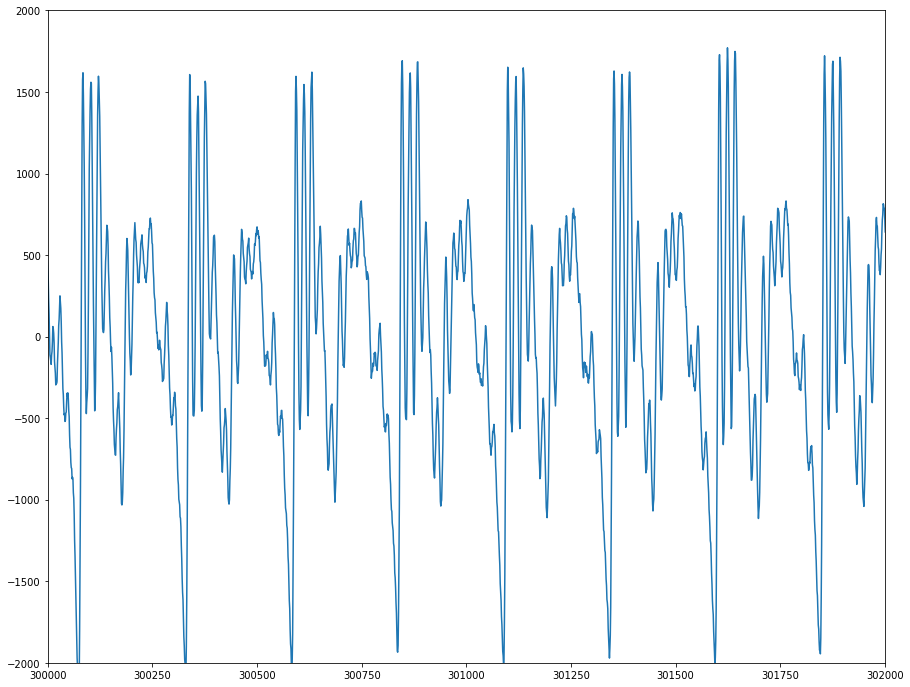

In [116]:
plt.figure( figsize=(15,12) )
plt.plot(left)
plt.xlim([300000,302000])
plt.ylim([-2000,2000])

In [217]:
# generate an audio signal:


#def normalized_wf_to_bytes( signal, channels=1,width=2,fs=44100):
#    
#    if channels != 1:
#        raise Exception("only channels=1 is implemented")
#    
#    factor = 2 ** (8*width-1) - 1
#    
#    return b"".join( map( lambda e : int(e*factor).to_bytes(width,"little", signed=True), s ) )

In [171]:
#def make_sine_wave(durration, fs, freq ):
#    
#    return np.sin( 2 * np.pi * np.arange(0,durration,1/fs) * freq )

In [174]:
s = make_sine_wave(0.01, 44100, 1000 )

In [276]:

out_data = []

fs = 16000

#s = make_sine_wave(2, fs, 1000 )
s = ba

s_bytes = normalized_wf_to_bytes( s, fs=fs )
loc = 0
start_time = time.time()


p = pyaudio.PyAudio()

# define callback (2)
def callback(in_data, frame_count, time_info, status):
    
    global loc,s_bytes,out_data,start_time
        
    data = s_bytes[loc:loc+frame_count*2]
    loc = loc + frame_count*2
    
    out_data.append(in_data)
    
    if len(data) < ( frame_count*2 ):
        data = data + ( int(0).to_bytes(2,"little", signed=True) * ( (frame_count*2) - len(data) ) )

    if ( time.time() - start_time ) < 5:
        ret_val = pyaudio.paContinue
    else:
        ret_val = pyaudio.paComplete
                       
    return (data, ret_val)

# open stream using callback (3)
stream = p.open(format=p.get_format_from_width(2),
                channels=1,
                rate=fs,
                output=True,
                stream_callback=callback,
                input=True)

# start the stream (4)
stream.start_stream()

# wait for stream to finish (5)
while stream.is_active():
    time.sleep(0.1)

# stop stream (6)
stream.stop_stream()
stream.close()
wf.close()

# close PyAudio (7)
p.terminate()

In [273]:
ba = bytes_to_arrays(b"".join(out_data),samplewidth=2, channels=1) 

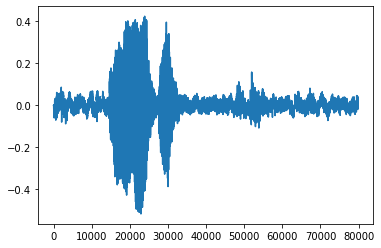

In [274]:
plt.plot(ba)

In [266]:
len(ba)/fs

4.992

In [229]:
ba = bytes_to_arrays(s_bytes,samplewidth=2, channels=1)

(0.0, 50.0)

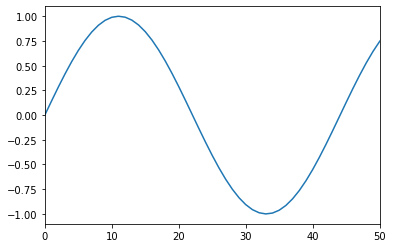

In [232]:
plt.plot(ba/32767)
plt.xlim([0,50])

In [3]:
fs = 8000

signals = []

signals.append( make_sine_wave(0.25, fs=fs, freq=500 ) )
signals.append( make_silence(0.25, fs=fs ) )
signals.append( make_sine_wave(0.25, fs=fs, freq=500 ) )
signals.append( make_silence(0.25, fs=fs ) )

In [6]:
np.concatenate( signals ).shape

(8000,)

In [7]:
"Bryce".encode("utf-8")

b'Bryce'

In [10]:
dir(bitstring)

['BIT_COUNT',
 'BRACKET_RE',
 'BYTE_REVERSAL_DICT',
 'BitArray',
 'BitStream',
 'BitString',
 'Bits',
 'ByteAlignError',
 'ByteStore',
 'CACHE_SIZE',
 'ConstBitArray',
 'ConstBitStream',
 'ConstByteStore',
 'CreationError',
 'DEFAULT_UINT',
 'Error',
 'INIT_NAMES',
 'InterpretError',
 'LEADING_OCT_CHARS',
 'LITERAL_RE',
 'MAX_CHARS',
 'MULTIPLICATIVE_RE',
 'MmapByteArray',
 'OCT_TO_BITS',
 'PACK_CODE_SIZE',
 'REPLACEMENTS_BE',
 'REPLACEMENTS_LE',
 'ReadError',
 'STRUCT_PACK_RE',
 'STRUCT_SPLIT_RE',
 'TOKEN_RE',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__licence__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_lsb0',
 '_switch_lsb0_methods',
 '_tokenname_to_initialiser',
 'array',
 'basestring',
 'binascii',
 'bytealigned',
 'byteorder',
 'collections',
 'collectionsAbc',
 'copy',
 'equal',
 'expand_brackets',
 'file',
 'i',
 'init_with_length_and_offset',
 'init_with_length_only',
 'init_without_length_or_offse

In [11]:
help(bitstring.BitArray)

Help on class BitArray in module bitstring:

class BitArray(Bits)
 |  BitArray(auto=None, length=None, offset=None, **kwargs)
 |  
 |  A container holding a mutable sequence of bits.
 |  
 |  Subclass of the immutable Bits class. Inherits all of its
 |  methods (except __hash__) and adds mutating methods.
 |  
 |  Mutating methods:
 |  
 |  append() -- Append a bitstring.
 |  byteswap() -- Change byte endianness in-place.
 |  insert() -- Insert a bitstring.
 |  invert() -- Flip bit(s) between one and zero.
 |  overwrite() -- Overwrite a section with a new bitstring.
 |  prepend() -- Prepend a bitstring.
 |  replace() -- Replace occurrences of one bitstring with another.
 |  reverse() -- Reverse bits in-place.
 |  rol() -- Rotate bits to the left.
 |  ror() -- Rotate bits to the right.
 |  set() -- Set bit(s) to 1 or 0.
 |  
 |  Methods inherited from Bits:
 |  
 |  all() -- Check if all specified bits are set to 1 or 0.
 |  any() -- Check if any of specified bits are set to 1 or 0.
 | 

In [14]:
ba = bitstring.BitArray( "Bryce".encode("utf-8") )

In [15]:
dir(ba)

['__add__',
 '__and__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ilshift__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__irshift__',
 '__iter__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__radd__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__ror__',
 '__rshift__',
 '__rxor__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__xor__',
 '_append',
 '_assertsanity',
 '_clear',
 '_converttobitstring',
 '_copy',
 '_datastore',
 '_delete',
 '_delete_lsb0',
 '_delete_msb0',
 '_ensureinmemory',
 '_find_lsb0',
 '_find_msb0',
 '_findbytes',
 '_findregex',
 '_getbin',
 '_getbool',
 '_getby

In [3]:
for bit in string_to_binary("Bryce"):
    print(bit)

False
True
False
False
False
False
True
False
False
True
True
True
False
False
True
False
False
True
True
True
True
False
False
True
False
True
True
False
False
False
True
True
False
True
True
False
False
True
False
True


In [ ]:
#def string_to_binary(s):
    
    #return bitstring.BitArray( s.encode("utf-8") )